# Crie um modelo de regressão linear para prever o peso PRÁTICA 3.1
### À semelhança do que foi feito na lição "Seu primeiro modelo: regressão linear", você vai criar um modelo que, com base na altura de uma pessoa (em metros), deve prever o peso (em Kg).

- Crie um novo arquivo CSV semelhante ao arquivo Celsius/Fahrenheit, só que ele conterá dados de altura e peso.
- Insira pelo menos 10 registros de altura e seu peso correspondente. Eles podem ser dados de sua família, amigos ou da Internet.
- Treine o modelo de regressão linear, como na lição "Seu primeiro modelo: regressão linear".
- Uma vez treinado, ele tenta fazer previsões, inserindo uma altura e retorna o peso estimado.
- Funciona bem ou não? Por que você acha que é assim?

In [68]:
import pandas as pd 

# Case 1
dados_fifa23 = pd.read_csv("CLEAN_FIFA23_official_data.csv")

# Case 2
dados_bmi = pd.read_csv("bmi.csv")

Case1: FIFA23 OFFICIAL DATASET(CLEAN DATA) - Dados dos Jogadores FIFA23
- Fonte: https://www.kaggle.com/datasets/kevwesophia/fifa23-official-datasetclean-data?select=CLEAN_FIFA23_official_data.csv

Case2: BMI Analysis - Dados de análise de IMC de 741 indivíduos
- Fonte: https://www.kaggle.com/datasets/rukenmissonnier/age-weight-height-bmi-analysis?select=bmi.csv

In [69]:
#Caracteristicas (x), etiquetas (y) 
#Obs:
#    kg = (lbs.) * 0.453592
#    m = (cm) / 100

X1 = dados_fifa23['Weight(lbs.)'] * 0.453592
Y1 = dados_fifa23['Height(cm.)'] / 100

X2 = dados_bmi['Weight']
Y2 = dados_bmi['Height']

#Processando x e y -> [[x/y]]
x_reshaped1 = X1.values.reshape(-1,1)
y_reshaped1 = Y1.values.reshape(-1,1)

x_reshaped2 = X2.values.reshape(-1,1)
y_reshaped2 = Y2.values.reshape(-1,1)

In [70]:
# Importando um modelo de treinamento -> regressao linear
from sklearn.linear_model import LinearRegression

# Preparando os modelos 
modelo_case1 = LinearRegression()
modelo_case2 = LinearRegression()

# Treinando os modelos
modelo_case1.fit(x_reshaped1, y_reshaped1)
modelo_case2.fit(x_reshaped2, y_reshaped2)


LinearRegression()

In [71]:
#Prevendo alturas

peso = 70
altura_case1 = modelo_case1.predict([[peso]])
altura_case2 = modelo_case2.predict([[peso]])

print(f'Case 1:\n Normalmente, alguem que pesa {peso} kg, mede {(altura_case1[0][0].round(3))} m')
print(f'Case 2:\n Normalmente, alguem que pesa {peso} kg, mede {altura_case2[0][0].round(3)} m')

Case 1:
 Normalmente, alguem que pesa 70 kg, mede 1.776 m
Case 2:
 Normalmente, alguem que pesa 70 kg, mede 1.696 m


In [72]:
#Avaliando a precisao dos modelos 
#de 0 a 1 (excelente)
avaliacao_case1 = modelo_case1.score(x_reshaped1, y_reshaped1)
avaliacao_case2 = modelo_case2.score(x_reshaped2, y_reshaped2)


print(f'Case 1: {avaliacao_case1.round(3)} score')
print(f'Case 2: {avaliacao_case2.round(3)} score')

Case 1: 0.584 score
Case 2: 0.369 score


## Visualização dos dados de forma gráfica

AxesSubplot(0.125,0.11;0.775x0.77)


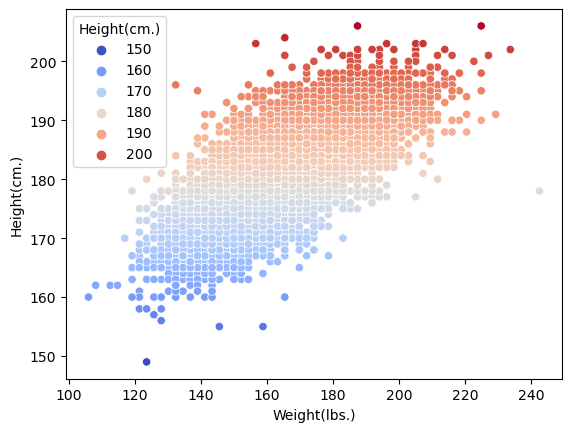

In [73]:
import seaborn as sb 

#Case1
case1_graphic = sb.scatterplot(x="Weight(lbs.)", y="Height(cm.)", data=dados_fifa23, hue="Height(cm.)", palette="coolwarm")
print(case1_graphic)

AxesSubplot(0.125,0.11;0.775x0.77)


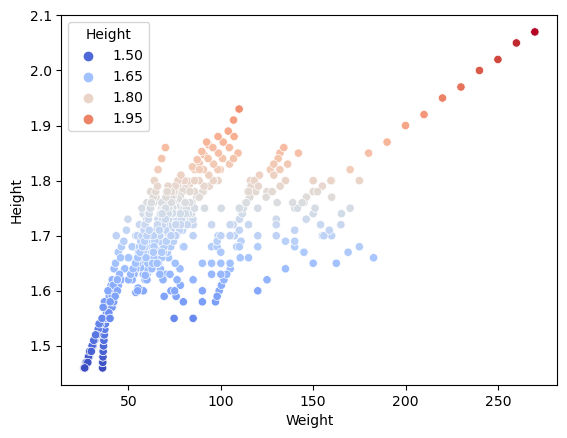

In [74]:
#Previsualizando o grafico: Case 2
case2_graphic = sb.scatterplot(x="Weight", y="Height", data=dados_bmi, hue="Height", palette="coolwarm")
print(case2_graphic)